In [78]:
import numpy as np
from numpy import sqrt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%run ../funtion/Normalizar.ipynb

# Exercicio 5
# Processos Estocásticos Canônicos: Caos Determinístico e Turbulência

# Familia Logistica 
### rho 3.81 - 4.0

In [51]:
rho = np.linspace(3.81,4.0,30)
tau = 1.1
N = 511

logistica = np.zeros([N+1,30])

for t in range(30):
    
    xtemp = 0.001
    ytemp = 0.001
    
    x = [xtemp]
    y = [ytemp]
    
    for i in range(N):
        xtemp, ytemp = Logistic(rho[t],tau,xtemp,ytemp)
        x.append( xtemp )
        y.append( ytemp )
        
    logistica[:,t] = x

# Familia Henon 
### a 1.35 - 1.40 e b 0.21 - 0.30

In [52]:
a = np.linspace(1.35,1.40,30)
b = np.linspace(0.21,0.30,30)

N = 511

henon = np.zeros([N+1,30])

for t in range(30):

    xtemp = 0.1
    ytemp = 0.3

    x = [xtemp]
    y = [ytemp]

    for i in range(N):
        xtemp, ytemp = HenonMap(a[t],b[t],xtemp,ytemp)
        x.append( xtemp )
        y.append( ytemp )
        
    henon[:,t] = y

Text(0.5, 1.0, 'Familas Henon')

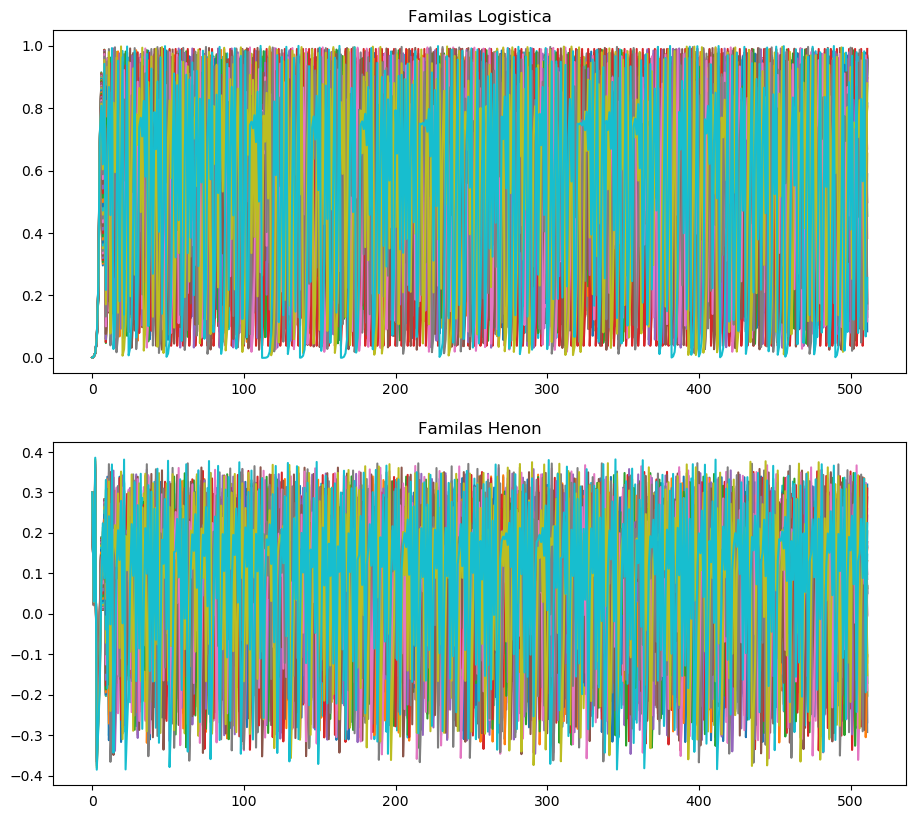

In [53]:
fig1 = plt.figure(figsize=(11,10),dpi=100)

plt.subplot(2, 1, 1)
plt.plot(logistica)
plt.title('Familas Logistica')

plt.subplot(2, 1, 2)
plt.plot(henon)
plt.title('Familas Henon')

# Obtencao de estadisticos

In [66]:
logistica_esta = Estadisticos(logistica)
henon_esta = Estadisticos(henon)

In [68]:
logistica_esta['Group'] = 'Logistica'
henon_esta['Group'] = 'Henon'

# Diagrama de dispersão

In [72]:
frames = [logistica_esta,henon_esta]
result = pd.concat(frames,ignore_index=True)

<Figure size 1000x1000 with 0 Axes>

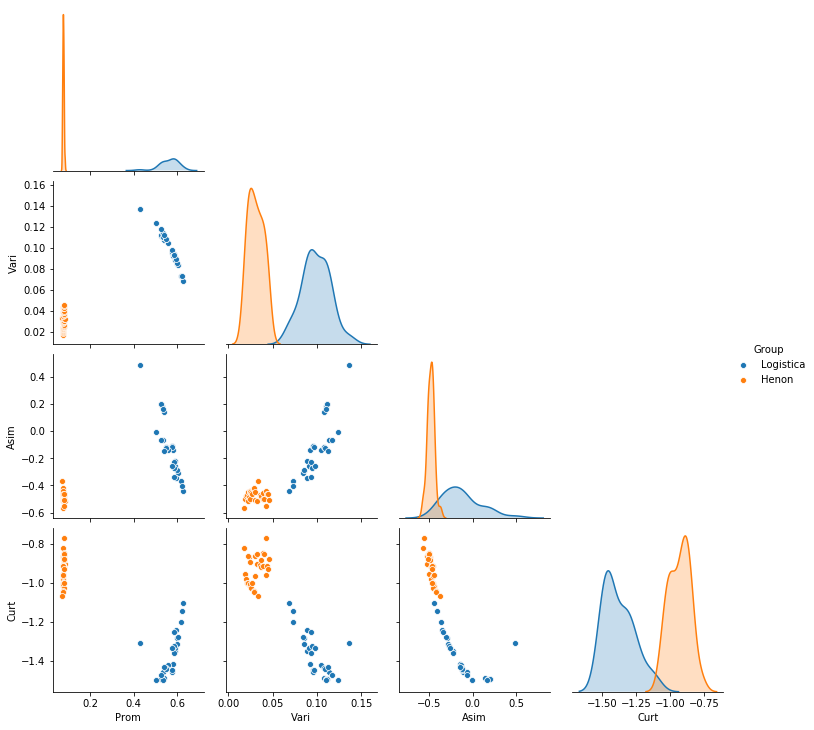

In [75]:
fig3 = plt.figure(figsize=(10,10),dpi=100)
sns.pairplot(result,hue="Group",corner=True)

# K-means

In [76]:
X = np.array(result[["Vari","Asim","Curt"]])
y = np.array(result['Group'])
X.shape

(60, 3)

In [79]:
Nc = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

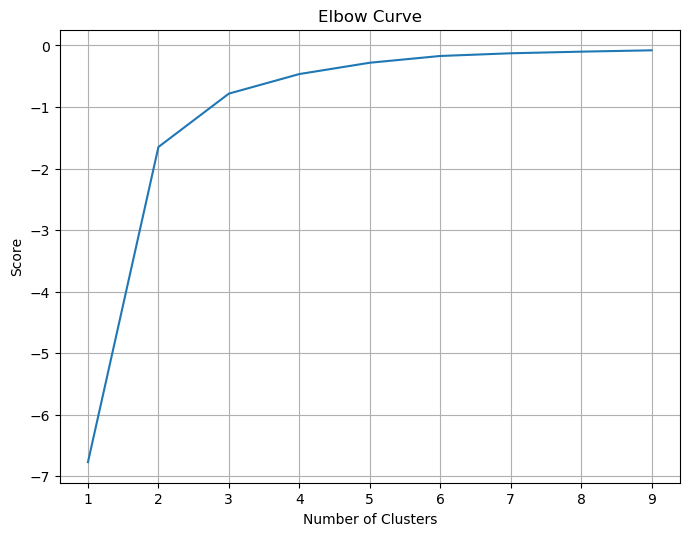

In [80]:
fig3 = plt.figure(figsize=(8,6),dpi=100)
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

In [81]:
X = np.array(result.drop(['Group'],axis=1))

In [82]:
kmeans = KMeans(n_clusters=2,random_state=0)

In [83]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [84]:
result['K-classes'] = kmeans.labels_

# Resultados

<Figure size 1000x1000 with 0 Axes>

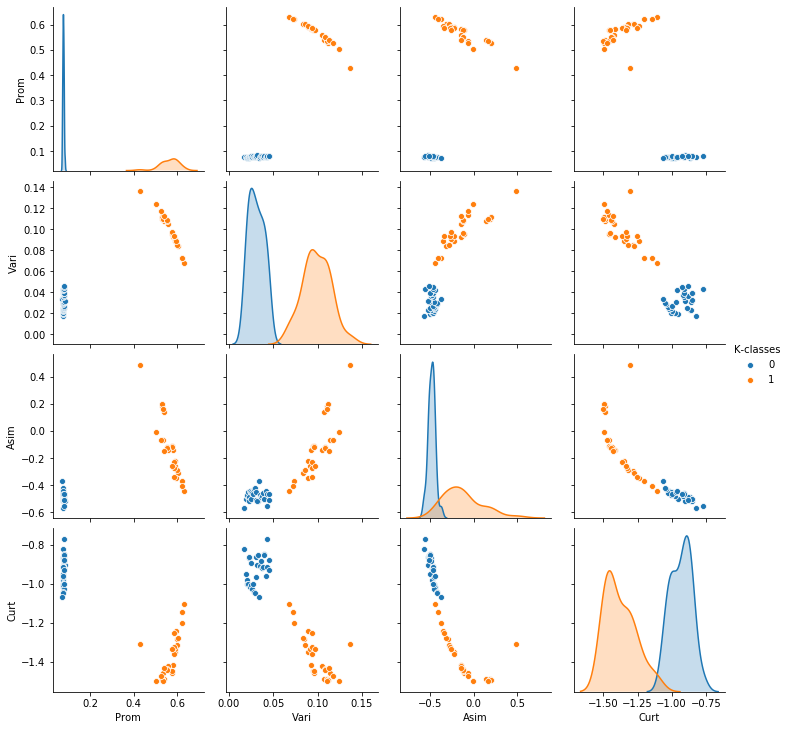

In [85]:
fig2 = plt.figure(figsize=(10,10),dpi=100)
sns.pairplot(result.drop(['Group'],axis=1),'K-classes')

In [86]:
k0 = result[result['K-classes'] == 0]
k1 = result[result['K-classes'] == 1]

In [87]:
k0

,Prom,Vari,Asim,Curt,Group,K-classes
30,0.076731,0.017532,-0.564050,-0.823399,Henon,0
31,0.075266,0.018776,-0.503240,-0.952762,Henon,0
32,0.074072,0.019996,-0.475906,-0.979629,Henon,0
33,0.074799,0.020602,-0.469120,-1.003347,Henon,0
34,0.073667,0.021871,-0.450101,-0.999978,Henon,0
35,0.073386,0.022733,-0.485762,-0.867846,Henon,0
36,0.077459,0.022621,-0.518919,-0.862698,Henon,0
37,0.074934,0.024130,-0.440758,-1.018530,Henon,0
38,0.076334,0.024750,-0.452635,-1.006872,Henon,0
39,0.078929,0.024883,-0.502696,-0.892076,Henon,0


In [88]:
k1

,Prom,Vari,Asim,Curt,Group,K-classes
0,0.628797,0.068079,-0.439954,-1.105453,Logistica,1
1,0.620426,0.072843,-0.367062,-1.203610,Logistica,1
2,0.621175,0.072755,-0.405131,-1.143267,Logistica,1
3,0.538227,0.107739,0.141561,-1.490646,Logistica,1
4,0.531623,0.110343,0.181488,-1.491037,Logistica,1
5,0.528798,0.111485,0.197276,-1.491837,Logistica,1
6,0.528563,0.111799,0.197331,-1.494314,Logistica,1
7,0.533937,0.110297,0.164747,-1.500806,Logistica,1
8,0.590669,0.088787,-0.219884,-1.349995,Logistica,1
9,0.581891,0.092422,-0.142586,-1.417033,Logistica,1


### O K-means funcionou perfeitamente no agrupamento das famílias Hennon e Logistica, como mostra a tabela acima, como mostrado no diagrama de dispersão, essas famílias estão bem separadas.